In [ ]:
! git clone https://github.com/ciol-researchlab/CIOL-Winter-ML-Bootcamp.git

fatal: destination path 'CIOL-Winter-ML-Bootcamp' already exists and is not an empty directory.


In [5]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
import xgboost as xgb
import lightgbm as lgb

In [6]:
# Step 1: Load Dataset
df = pd.read_csv('/content/CIOL-Winter-ML-Bootcamp/datasets/session1/assignment/o1/data.csv', encoding='latin1')
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [12]:
# Columns to convert from object to numeric (list based on dataset details)
columns_to_convert = [
    "Spotify Streams", "Spotify Playlist Count", "Spotify Playlist Reach",
    "YouTube Views", "YouTube Likes", "TikTok Posts", "TikTok Likes",
    "TikTok Views", "AirPlay Spins", "SiriusXM Spins", "Deezer Playlist Reach",
    "Pandora Streams", "Pandora Track Stations", "Soundcloud Streams",
    "Shazam Counts", 'YouTube Playlist Reach', 'All Time Rank'
]

# Convert object columns to numeric, handling commas and missing values
for col in columns_to_convert:
    if col in df.columns:
        df[col] = df[col].str.replace(',', '', regex=True).astype(float)

In [13]:
# Convert 'Release Date' to datetime format
df['Release Date'] = pd.to_datetime(df['Release Date'], format='%m/%d/%Y')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4600 non-null   object        
 1   Album Name                  4600 non-null   object        
 2   Artist                      4595 non-null   object        
 3   Release Date                4600 non-null   datetime64[ns]
 4   ISRC                        4600 non-null   object        
 5   All Time Rank               4600 non-null   float64       
 6   Track Score                 4600 non-null   float64       
 7   Spotify Streams             4487 non-null   float64       
 8   Spotify Playlist Count      4530 non-null   float64       
 9   Spotify Playlist Reach      4528 non-null   float64       
 10  Spotify Popularity          3796 non-null   float64       
 11  YouTube Views               4292 non-null   float64     

In [14]:
# Handle missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
TIDAL Popularity              4600
Exp

In [17]:
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor


# Simulate the dataset (replace this with your actual dataset loading)
# df = pd.read_csv('your_dataset.csv')

# Step 1: Convert all floats to integers (for non-null values)
float_columns = df.select_dtypes(include=['float64']).columns

for col in float_columns:
    df[col] = df[col].fillna(0).astype(int)

# Step 2: Handle Missing Values with Advanced Imputation
# Define numerical columns for KNN imputation
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
imputer = KNNImputer(n_neighbors=5)

# Apply KNN Imputer on numerical columns
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

# Step 3: Handle Categorical Missing Values
# Impute categorical 'Artist' using the most frequent value
df['Artist'] = df['Artist'].fillna(df['Artist'].mode()[0])

# Final Step: Convert numeric columns back to integers after imputation
for col in numeric_columns:
    df[col] = df[col].round(0).astype(int)

# Save the cleaned dataset
# df.to_csv("cleaned_dataset_imputed.csv", index=False)

# Display the info to confirm the changes
print("Data Types and Missing Values After Cleaning:")
print(df.info())
print("\nMissing Values After Imputation:")
print(df.isnull().sum())


Data Types and Missing Values After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4600 non-null   object        
 1   Album Name                  4600 non-null   object        
 2   Artist                      4600 non-null   object        
 3   Release Date                4600 non-null   datetime64[ns]
 4   ISRC                        4600 non-null   object        
 5   All Time Rank               4600 non-null   int64         
 6   Track Score                 4600 non-null   int64         
 7   Spotify Streams             4600 non-null   int64         
 8   Spotify Playlist Count      4600 non-null   int64         
 9   Spotify Playlist Reach      4600 non-null   int64         
 10  Spotify Popularity          4600 non-null   int64         
 11  YouTube Vi

In [18]:
# Step 3: Feature Engineering
# Create additional features
df['Engagement Ratio'] = df['Spotify Streams'] / df['Spotify Playlist Count']
df['Song Age (days)'] = (pd.Timestamp.now() - df['Release Date']).dt.days


In [41]:
# Drop the specified columns
columns_to_drop = ['ISRC']
df.drop(columns=columns_to_drop, inplace=True)


In [20]:
# Basic Statistical Analysis
print("Dataset Overview:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4600 non-null   object        
 1   Album Name                  4600 non-null   object        
 2   Artist                      4600 non-null   object        
 3   Release Date                4600 non-null   datetime64[ns]
 4   ISRC                        4600 non-null   object        
 5   All Time Rank               4600 non-null   int64         
 6   Track Score                 4600 non-null   int64         
 7   Spotify Streams             4600 non-null   int64         
 8   Spotify Playlist Count      4600 non-null   int64         
 9   Spotify Playlist Reach      4600 non-null   int64         
 10  Spotify Popularity          4600 non-null   int64         
 11  YouTube Views               4600 non-n

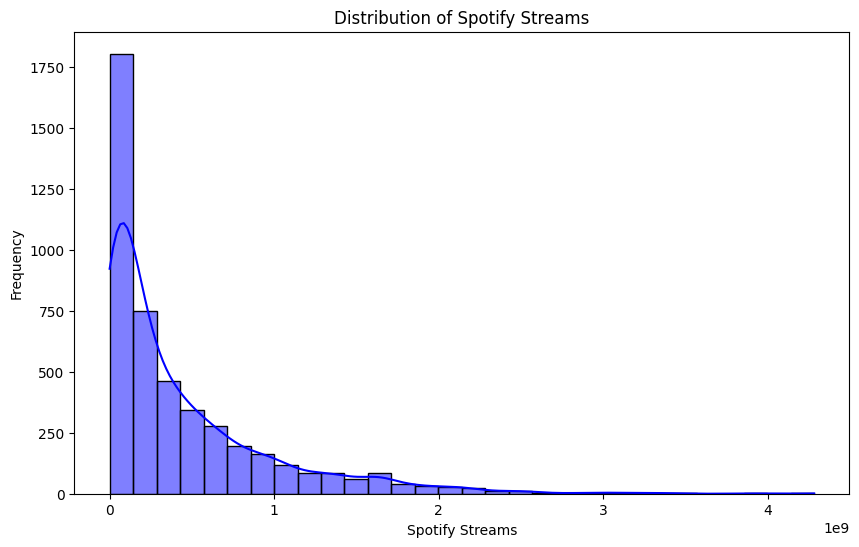

In [25]:
# Distribution of Spotify Streams
plt.figure(figsize=(10, 6))
sns.histplot(df['Spotify Streams'], bins=30, kde=True, color='blue')
plt.title("Distribution of Spotify Streams")
plt.xlabel("Spotify Streams")
plt.ylabel("Frequency")
plt.show()

<ipython-input-26-d1ef8be4386c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.index, y=top_artists.values, palette="viridis")


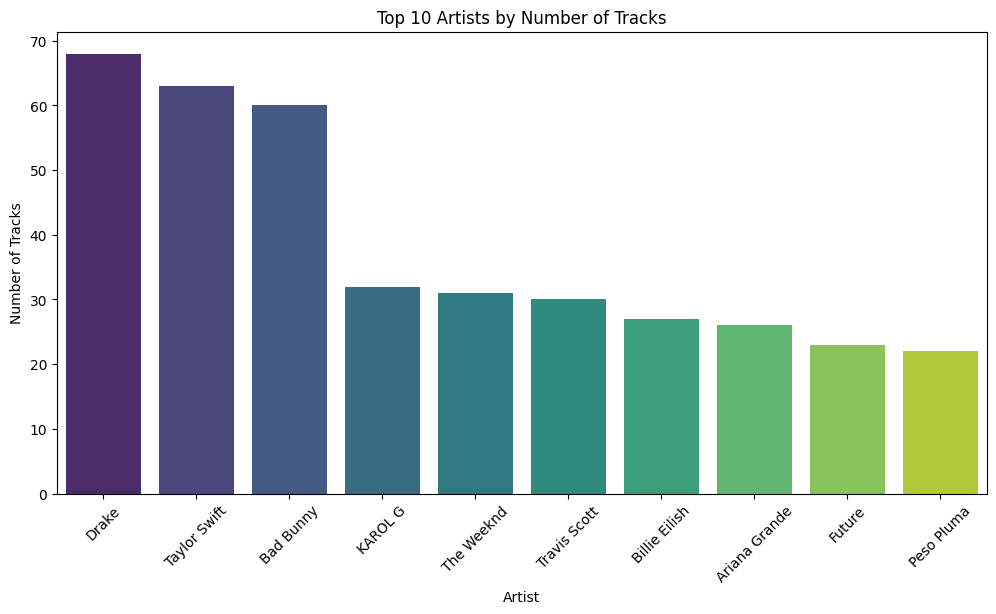

In [26]:
# Top 10 Artists with the Most Tracks
top_artists = df['Artist'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.index, y=top_artists.values, palette="viridis")
plt.title("Top 10 Artists by Number of Tracks")
plt.xticks(rotation=45)
plt.ylabel("Number of Tracks")
plt.show()

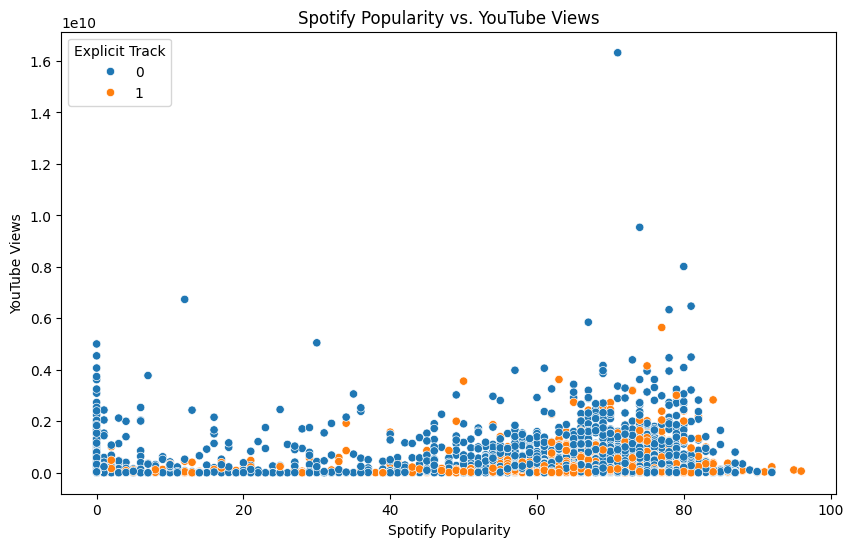

In [27]:
# Spotify Popularity vs. YouTube Views
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Spotify Popularity'], y=df['YouTube Views'], hue=df['Explicit Track'])
plt.title("Spotify Popularity vs. YouTube Views")
plt.xlabel("Spotify Popularity")
plt.ylabel("YouTube Views")
plt.legend(title="Explicit Track", loc='upper left')
plt.show()

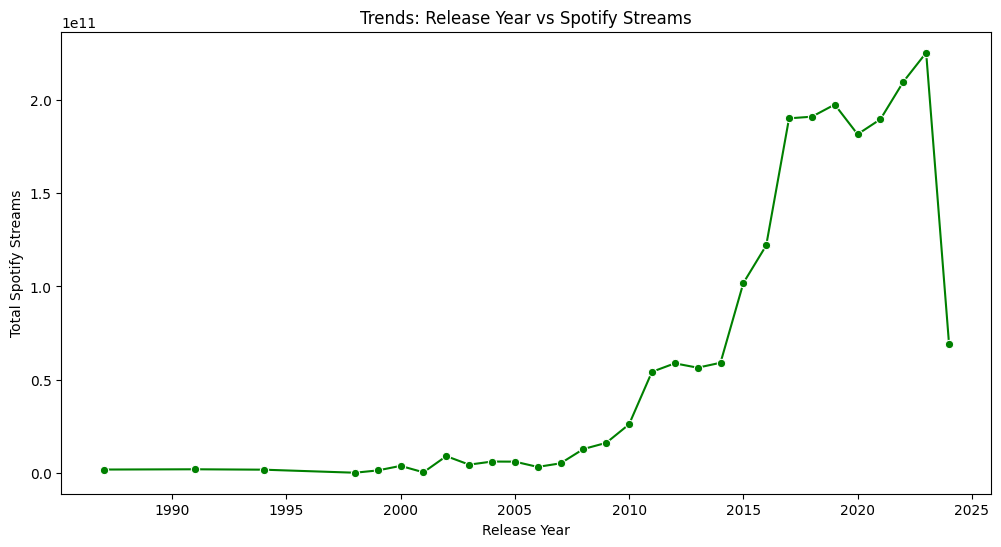

In [28]:
# Trends: Release Date vs Spotify Streams
df['Release Date'] = pd.to_datetime(df['Release Date'])
df_trends = df.groupby(df['Release Date'].dt.year)['Spotify Streams'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=df_trends.index, y=df_trends.values, marker='o', color='green')
plt.title("Trends: Release Year vs Spotify Streams")
plt.xlabel("Release Year")
plt.ylabel("Total Spotify Streams")
plt.show()

<ipython-input-29-010eb88f4bbd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Non-Explicit', 'Explicit'], y=explicit_counts.values, palette='coolwarm')


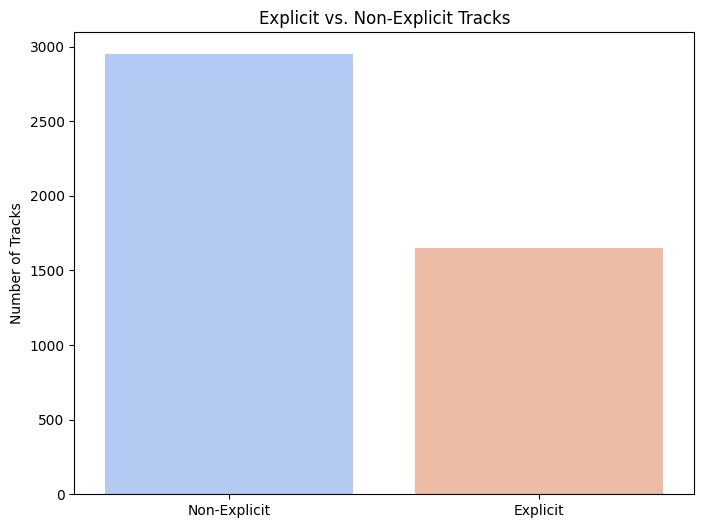

In [29]:
# Distribution of Explicit vs. Non-Explicit Tracks
plt.figure(figsize=(8, 6))
explicit_counts = df['Explicit Track'].value_counts()
sns.barplot(x=['Non-Explicit', 'Explicit'], y=explicit_counts.values, palette='coolwarm')
plt.title("Explicit vs. Non-Explicit Tracks")
plt.ylabel("Number of Tracks")
plt.show()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   All Time Rank               4600 non-null   int64  
 1   Track Score                 4600 non-null   int64  
 2   Spotify Streams             4600 non-null   int64  
 3   Spotify Playlist Count      4600 non-null   int64  
 4   Spotify Playlist Reach      4600 non-null   int64  
 5   Spotify Popularity          4600 non-null   int64  
 6   YouTube Views               4600 non-null   int64  
 7   YouTube Likes               4600 non-null   int64  
 8   TikTok Posts                4600 non-null   int64  
 9   TikTok Likes                4600 non-null   int64  
 10  TikTok Views                4600 non-null   int64  
 11  YouTube Playlist Reach      4600 non-null   int64  
 12  Apple Music Playlist Count  4600 non-null   int64  
 13  AirPlay Spins               4600 

In [49]:
# Encode categorical target
le = LabelEncoder()
df['Explicit Track'] = le.fit_transform(df['Explicit Track'])

In [50]:
# Step 4: Split Data into Features and Target
X = df.drop(['Explicit Track'], axis=1)
y = df['Explicit Track']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
df['Engagement Ratio'] = df['Engagement Ratio'].replace([np.inf, -np.inf], np.nan).fillna(0).astype(int)

In [51]:
# Standardize Numerical Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
# Step 5: Define Classifiers
models = {
    'Logistic Regression': LogisticRegression(),
    'SGD Classifier': SGDClassifier(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True),
    'KNN (k=3)': KNeighborsClassifier(n_neighbors=3),
    'KNN (k=5)': KNeighborsClassifier(n_neighbors=5),
    'Gaussian NB': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
}

In [53]:
voting = VotingClassifier(estimators=[
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))
], voting='soft')

In [54]:
stacking = StackingClassifier(estimators=[
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))
], final_estimator=LogisticRegression())

In [55]:
models['Voting Classifier'] = voting
models['Stacking Classifier'] = stacking

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1306, number of negative: 2374
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001828 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5586
[LightGBM] [Info] Number of data points in the train set: 3680, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.354891 -> initscore=-0.597607
[LightGBM] [Info] Start training from score -0.597607


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:24:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


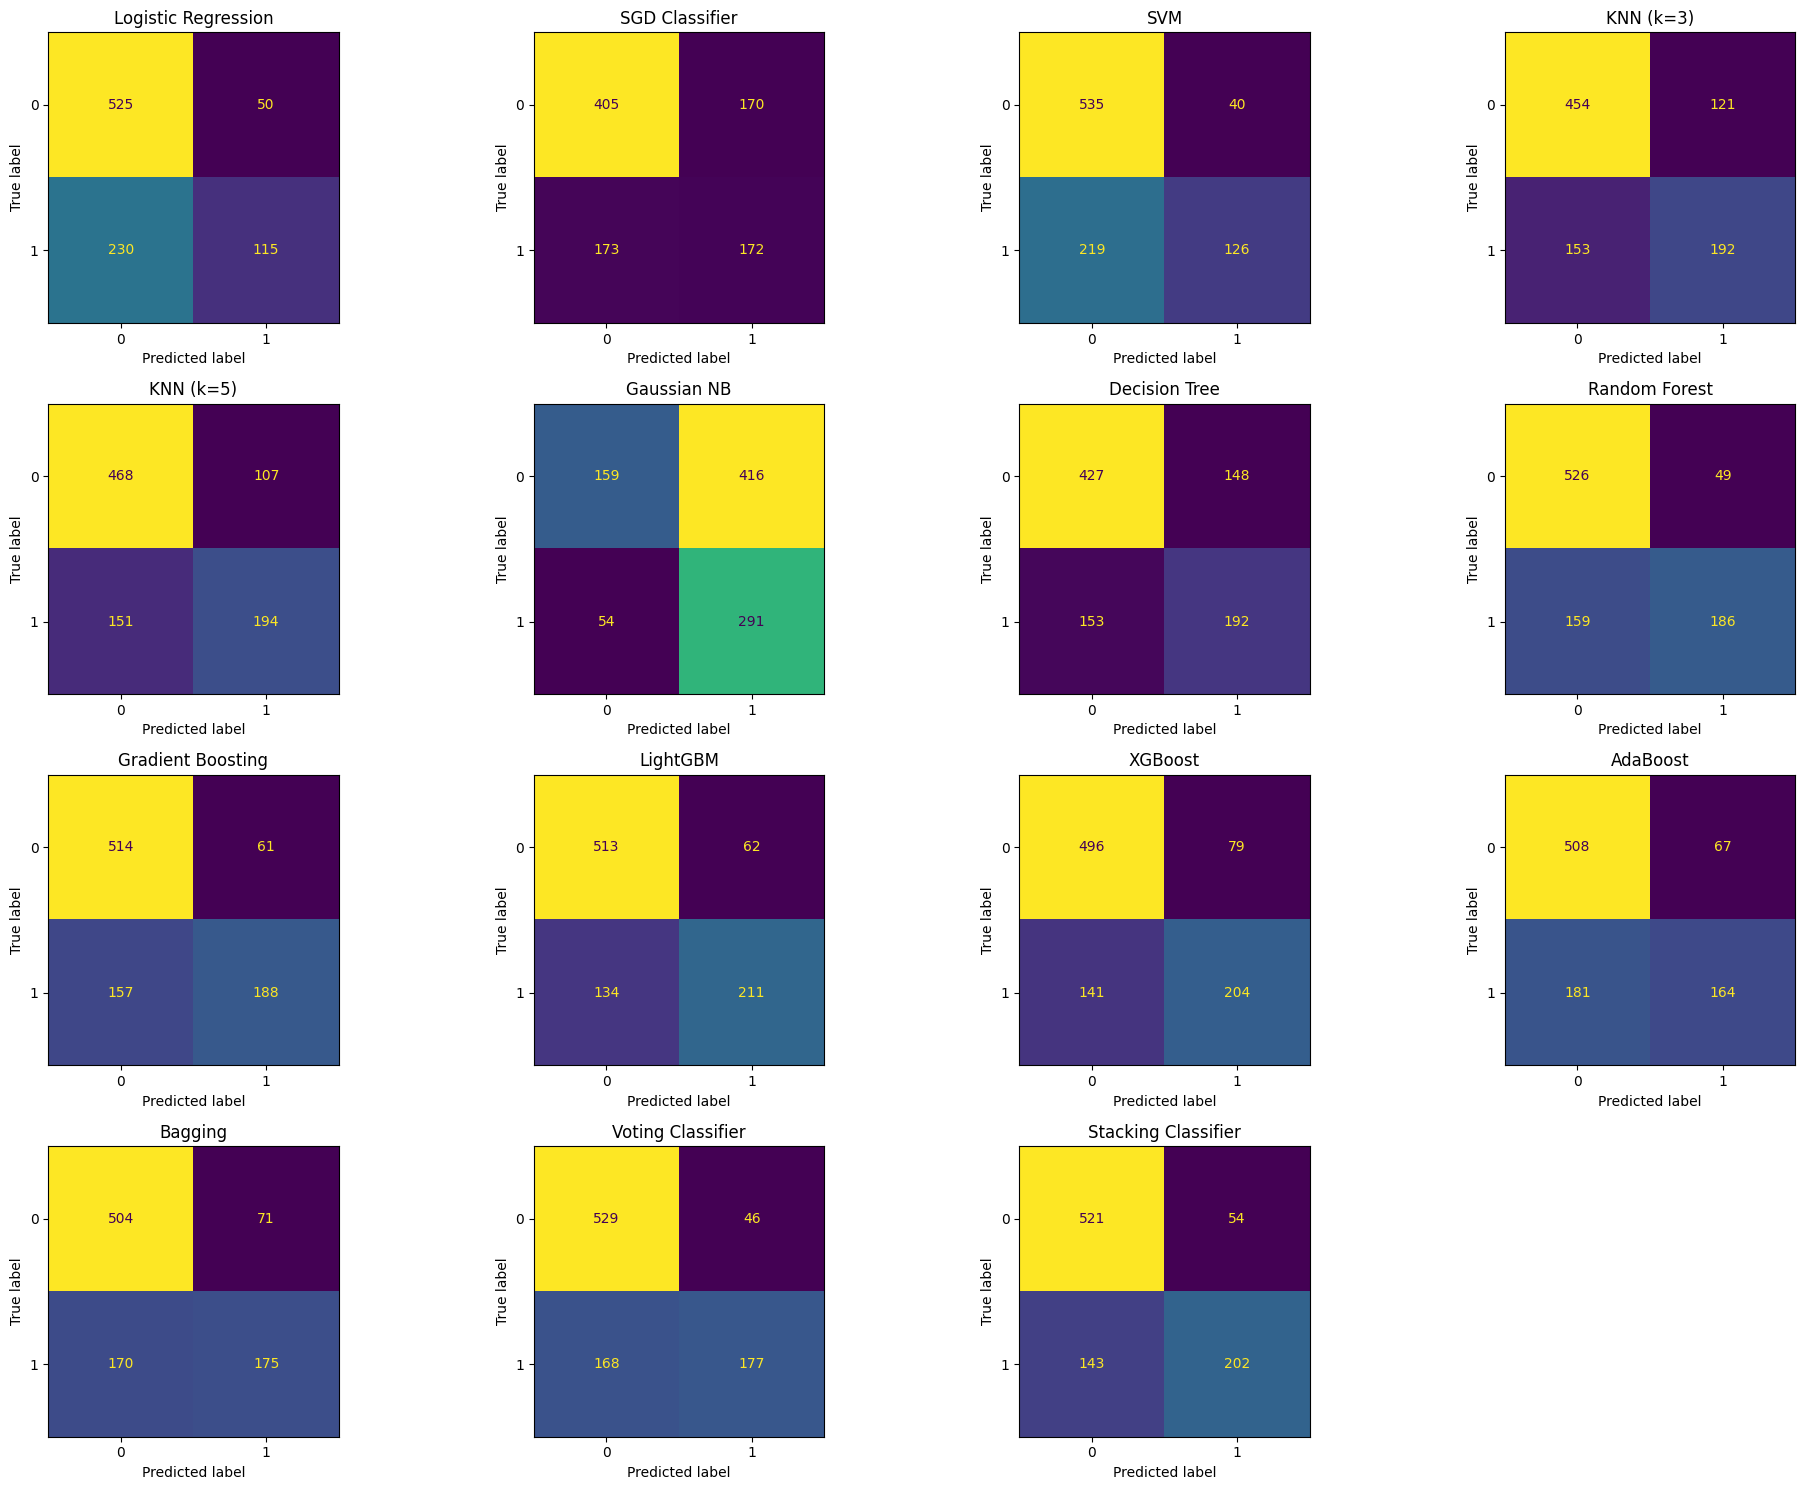

In [56]:
# Step 6: Train and Evaluate Models
results = []
plt.figure(figsize=(20, 15))

for i, (name, model) in enumerate(models.items()):
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Compute Metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        results.append((name, accuracy, precision, recall, f1))

        # Plot Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
        plt.subplot(4, 4, i + 1)
        disp.plot(ax=plt.gca(), cmap='viridis', colorbar=False)
        plt.title(name)
    except Exception as e:
        print(f"Error with {name}: {e}")

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1306, number of negative: 2374
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5586
[LightGBM] [Info] Number of data points in the train set: 3680, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.354891 -> initscore=-0.597607
[LightGBM] [Info] Start training from score -0.597607


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:25:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


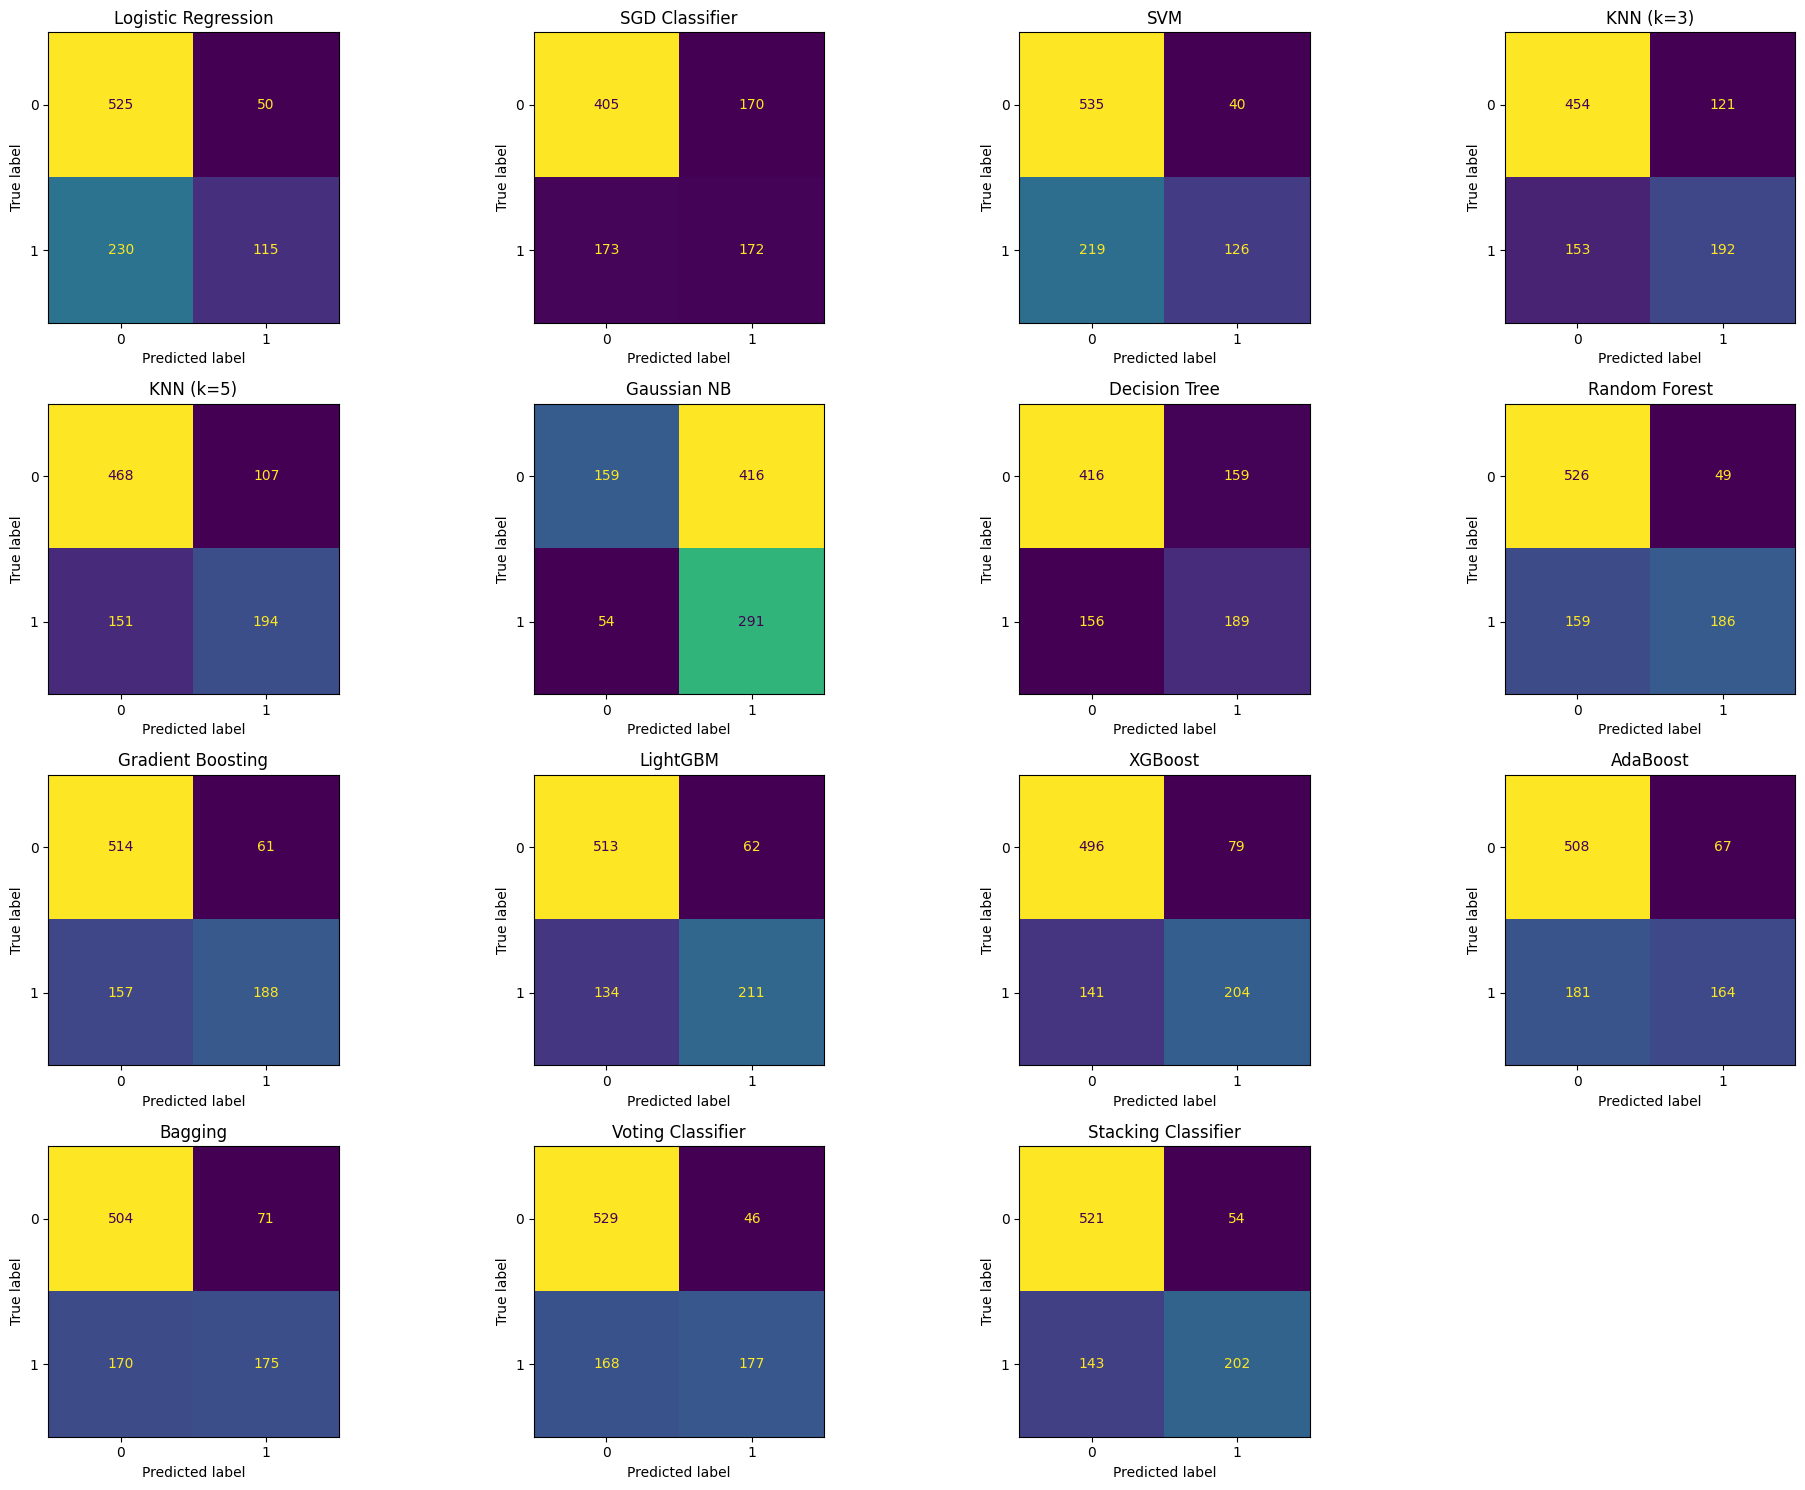


Model: Logistic Regression
  Accuracy: 0.6957
  Precision: 0.6970
  Recall: 0.3333
  F1 Score: 0.4510
  MAE: 0.3043
  MAPE: 244760849313614.1562
  MSE: 0.3043
  RMSE: 0.5517
  R2 Score: -0.2986

Model: SGD Classifier
  Accuracy: 0.6272
  Precision: 0.5029
  Recall: 0.4986
  F1 Score: 0.5007
  MAE: 0.3728
  MAPE: 832186887666287.5000
  MSE: 0.3728
  RMSE: 0.6106
  R2 Score: -0.5907

Model: SVM
  Accuracy: 0.7185
  Precision: 0.7590
  Recall: 0.3652
  F1 Score: 0.4932
  MAE: 0.2815
  MAPE: 195808679450891.3438
  MSE: 0.2815
  RMSE: 0.5306
  R2 Score: -0.2012

Model: KNN (k=3)
  Accuracy: 0.7022
  Precision: 0.6134
  Recall: 0.5565
  F1 Score: 0.5836
  MAE: 0.2978
  MAPE: 592321255338945.7500
  MSE: 0.2978
  RMSE: 0.5457
  R2 Score: -0.2707

Model: KNN (k=5)
  Accuracy: 0.7196
  Precision: 0.6445
  Recall: 0.5623
  F1 Score: 0.6006
  MAE: 0.2804
  MAPE: 523788217531133.9375
  MSE: 0.2804
  RMSE: 0.5296
  R2 Score: -0.1965

Model: Gaussian NB
  Accuracy: 0.4891
  Precision: 0.4116
  Recal

In [57]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    mean_absolute_error, mean_absolute_percentage_error,
    mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
)
import numpy as np
import matplotlib.pyplot as plt

# Initialize a dictionary to store results
results = {}

plt.figure(figsize=(20, 15))

for i, (name, model) in enumerate(models.items()):
    try:
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Classification Metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)

        # Regression Metrics
        mae = mean_absolute_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Store the results
        results[name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'MAE': mae,
            'MAPE': mape,
            'MSE': mse,
            'RMSE': rmse,
            'R2 Score': r2
        }

        # Plot Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
        plt.subplot(4, 4, i + 1)
        disp.plot(ax=plt.gca(), cmap='viridis', colorbar=False)
        plt.title(name)

    except Exception as e:
        print(f"Error with {name}: {e}")

plt.tight_layout()
plt.show()

# Print all results
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")
